In [65]:
import pandas as pd
import numpy as np

## Data preprocessing

In [66]:
#Load the dataset
df = pd.read_csv("/home/cristian/courses/machine_learning_UNAL/customer_churn_prediction/data/raw/train.csv")

In [67]:
observations, variables = df.shape
print(f"Observations: {observations}, Variables: {variables}")
df.info()


Observations: 15000, Variables: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [68]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15709511.0,Ch'ang,754.0,Spain,Male,40.0,8.0,102954.68,2.0,1.0,1.0,149238.35,0.0
1,1,15592761.0,Genovese,579.0,France,Female,28.0,1.0,0.00,2.0,1.0,0.0,64869.32,0.0
2,2,15579914.0,Yeh,744.0,France,Female,56.0,5.0,0.00,1.0,1.0,0.0,158816.03,1.0
3,3,15669611.0,Nwachinemelu,697.0,France,Male,29.0,2.0,0.00,2.0,1.0,0.0,55775.72,0.0
4,4,15761775.0,Hs?eh,628.0,France,Female,22.0,9.0,0.00,2.0,1.0,0.0,49653.39,0.0


In [69]:
# Convert categorical variables to 'category' dtype
df['HasCrCard'] = df['HasCrCard'].astype(bool)
df['IsActiveMember'] = df['IsActiveMember'].astype(bool)
df['Exited'] = df['Exited'].astype(bool)

# Drop id and surname columns
df.drop(columns=['id', 'CustomerId','Surname'], inplace=True)



In [70]:
# Columnas resultantes
print(df.columns.tolist())

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [71]:
df['Exited'].value_counts()

Exited
False    11942
True      3058
Name: count, dtype: int64


## EDA

#### Basic descriptive statistics

In [72]:
# Numerical variables
df.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04
mean,658.851467,37.888000,5.033333,43124.060479,1.590733,1.181348e+05
std,72.587026,8.257409,2.808359,59777.868496,0.535587,4.680311e+04
min,431.000000,18.000000,0.000000,0.000000,1.000000,1.158000e+01
25%,602.000000,32.000000,3.000000,0.000000,1.000000,8.362960e+04
50%,662.000000,37.000000,5.000000,0.000000,2.000000,1.235878e+05
75%,709.000000,42.000000,7.000000,109650.982500,2.000000,1.575585e+05
max,850.000000,74.000000,10.000000,187530.660000,4.000000,1.557802e+06


In [73]:
df_categorical = df.select_dtypes(include=['object', 'bool'])
ala = df_categorical.describe()

#Frecuencias relativas variables categóricas
for col in df_categorical.columns:
    print(f"Frecuencias relativas de {col}:")
    print(df_categorical[col].value_counts(normalize=True))
    print()

Frecuencias relativas de Geography:
Geography
France     0.598067
Spain      0.221400
Germany    0.180533
Name: proportion, dtype: float64

Frecuencias relativas de Gender:
Gender
Male      0.5572
Female    0.4428
Name: proportion, dtype: float64

Frecuencias relativas de HasCrCard:
HasCrCard
True     0.7832
False    0.2168
Name: proportion, dtype: float64

Frecuencias relativas de IsActiveMember:
IsActiveMember
True     0.5002
False    0.4998
Name: proportion, dtype: float64

Frecuencias relativas de Exited:
Exited
False    0.796133
True     0.203867
Name: proportion, dtype: float64



<Figure size 1200x800 with 0 Axes>

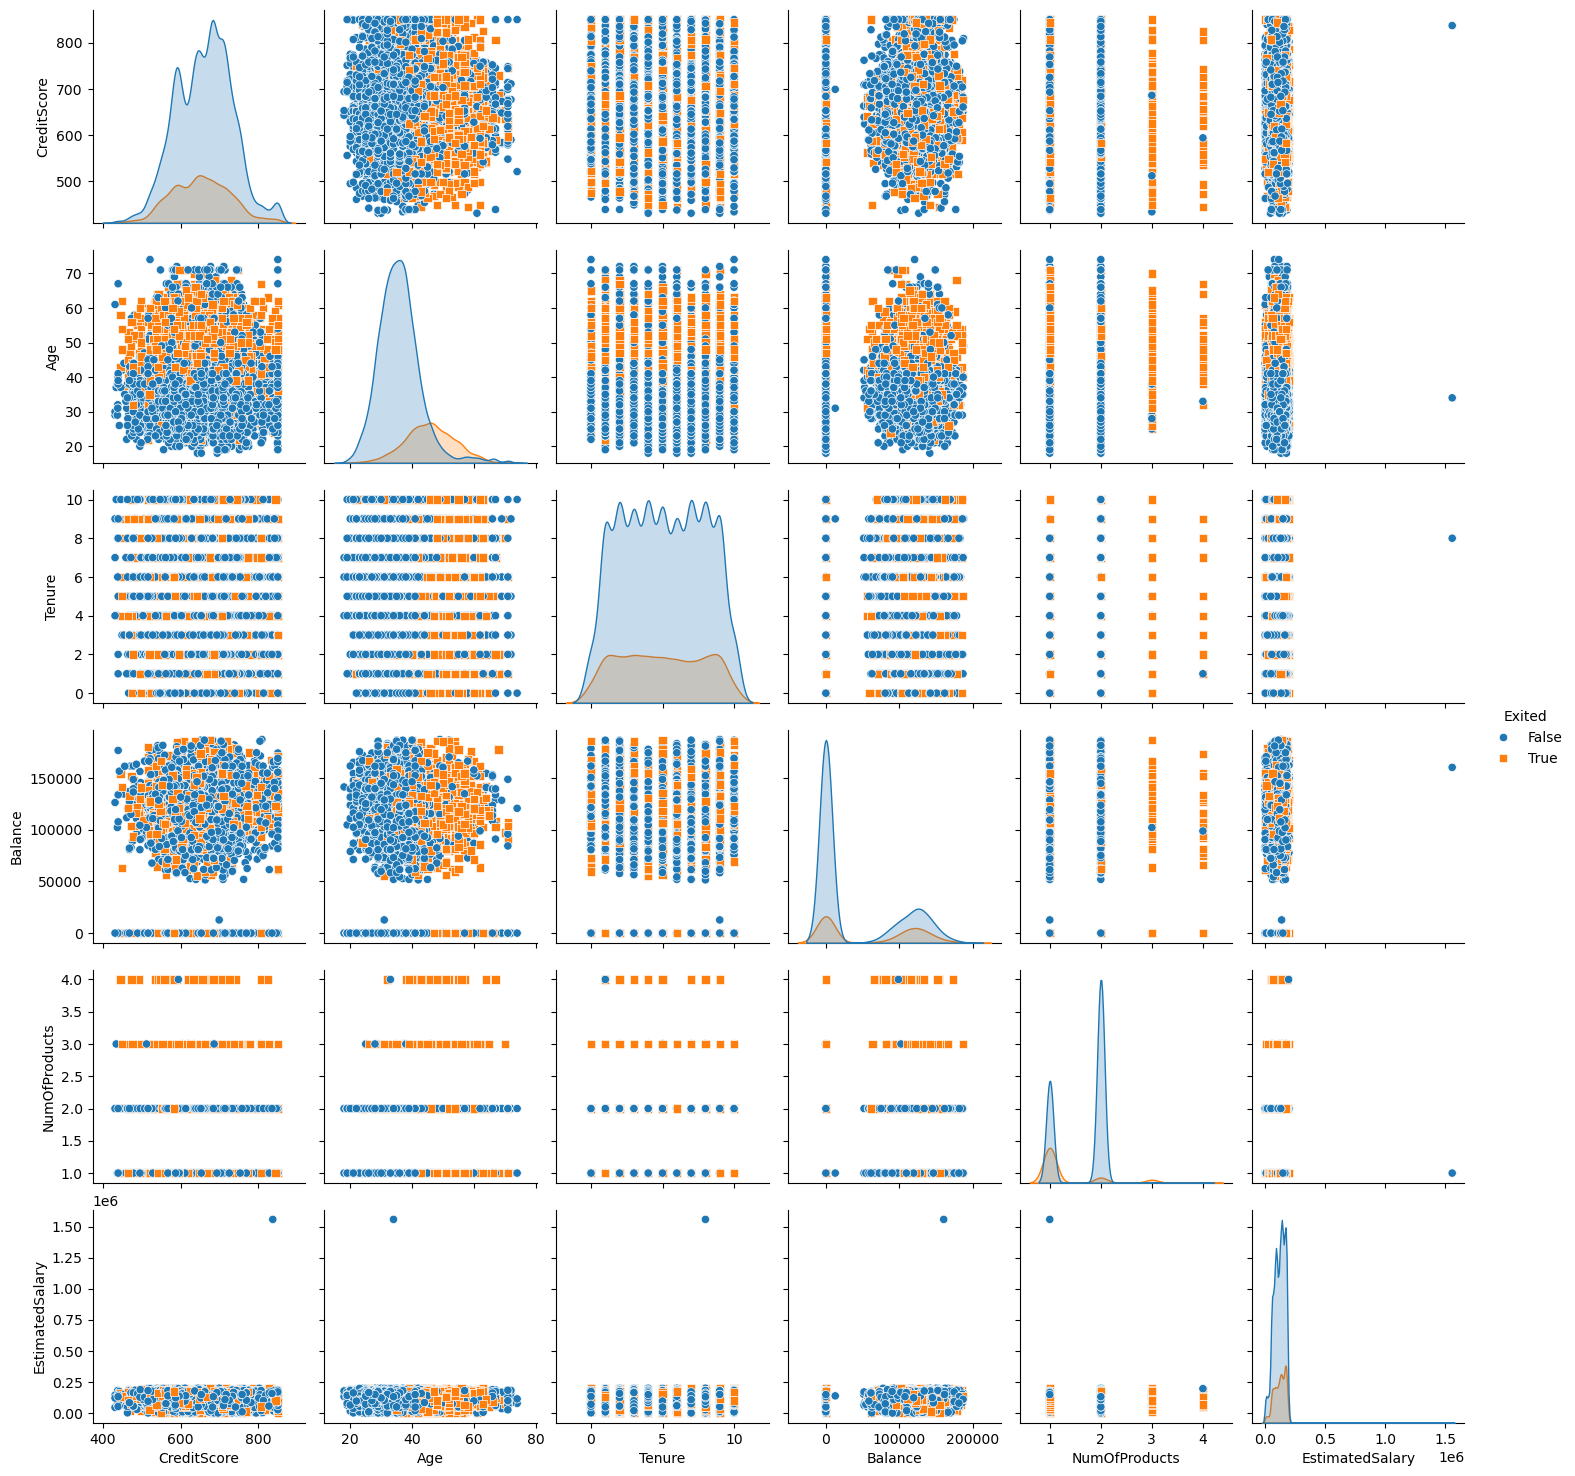

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numerical = df.select_dtypes(include=['number'])
df_numerical['Exited'] = df['Exited'].astype(bool)
plt.figure(figsize=(12, 8))
sns.pairplot(df_numerical, diag_kind='kde', hue='Exited', markers=["o", "s"])
plt.show()

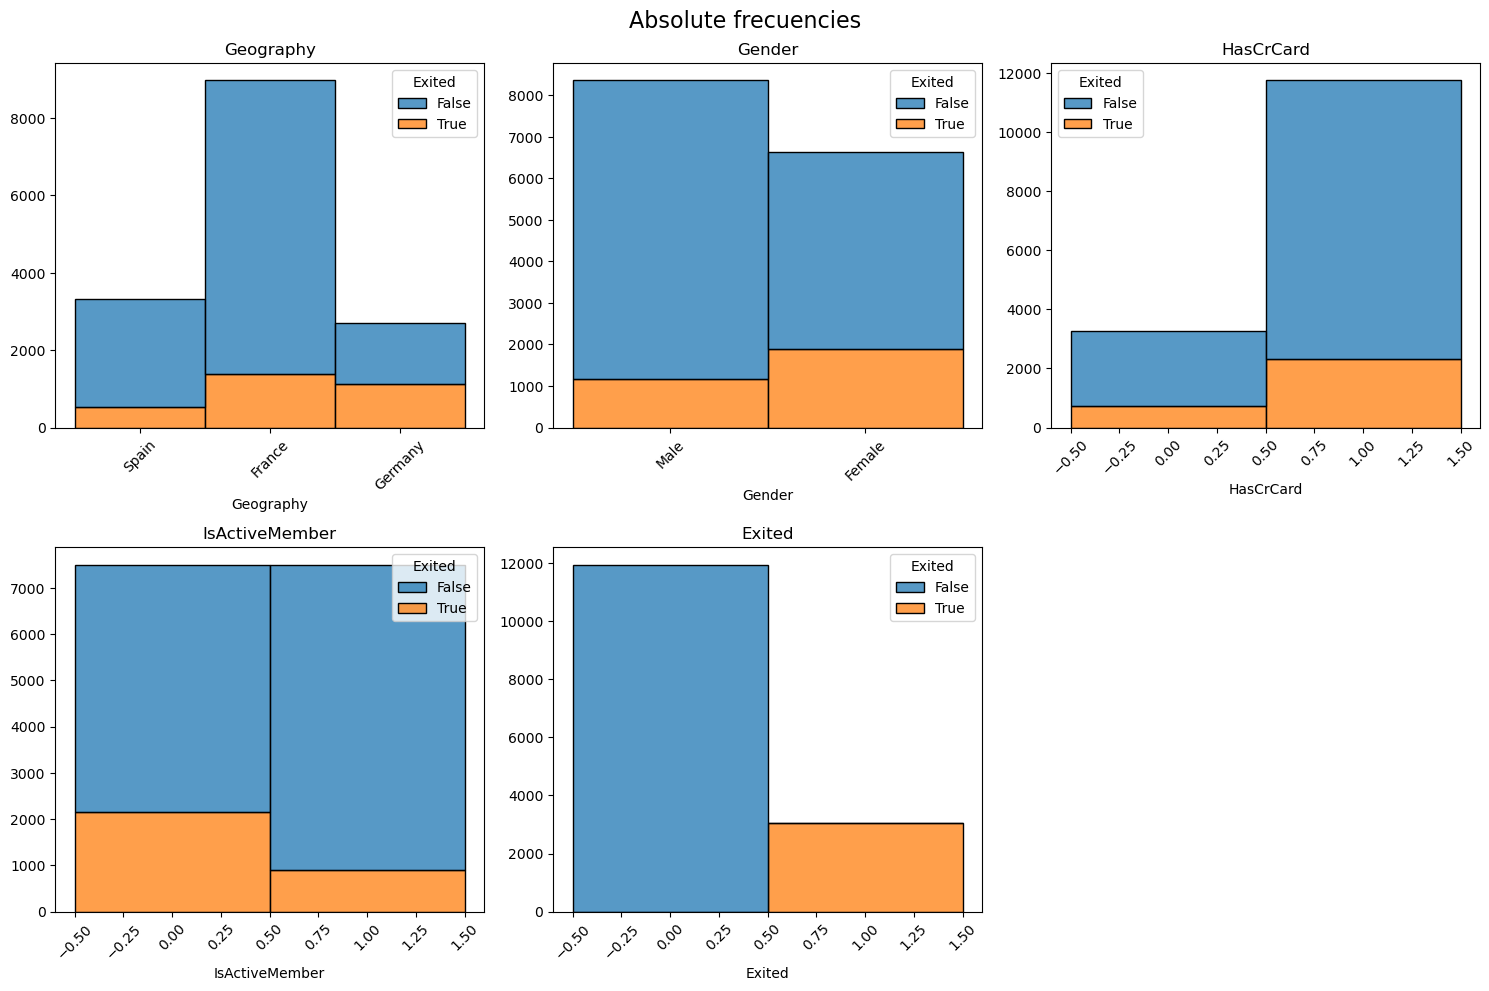

In [75]:
# Categorical variables
df_categorical = df.select_dtypes(include=['object', 'bool'])

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Get categorical columns
categorical_columns = df_categorical.columns.tolist()

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    sns.histplot(data=df_categorical, x=column, ax=axes[i], discrete=True, kde=False, hue='Exited', multiple='stack', stat='count')
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('')

for j in range(len(categorical_columns), len(axes)):
    axes[j].set_visible(False)
fig.suptitle('Absolute frecuencies', fontsize=16)
plt.tight_layout()
plt.show()

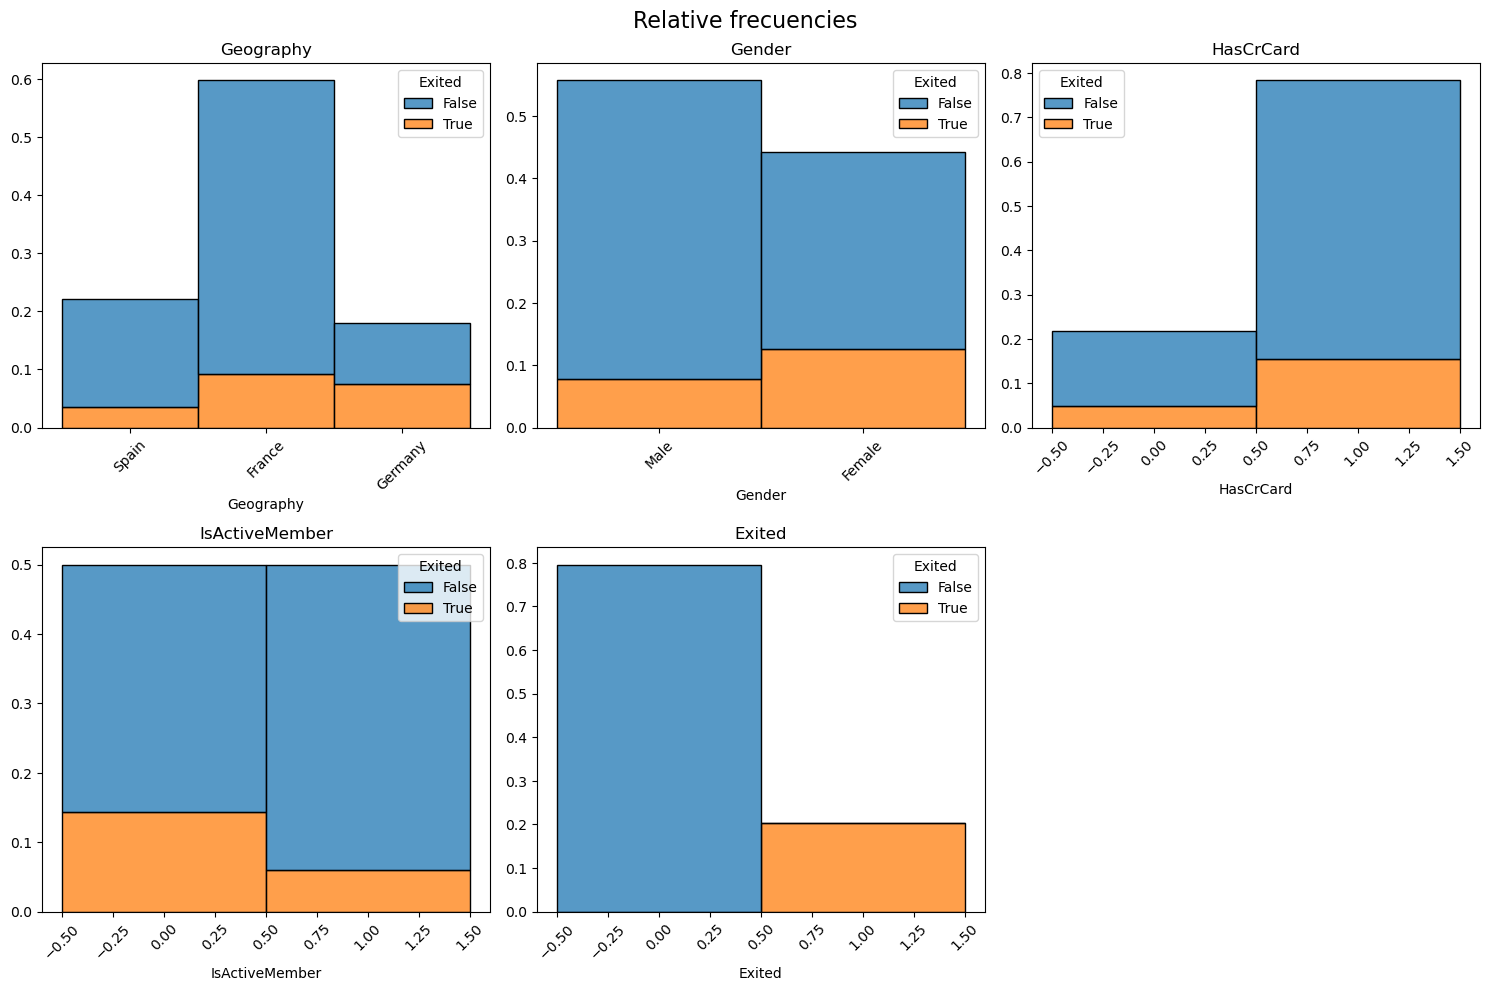

In [76]:
# Categorical variables
df_categorical = df.select_dtypes(include=['object','bool'])
df_categorical.describe()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()  

# Get categorical columns
categorical_columns = df_categorical.columns.tolist()

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    sns.histplot(data=df_categorical, x=column, ax=axes[i], discrete=True, kde=False, stat='probability', hue='Exited', multiple='stack')
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('')

for j in range(len(categorical_columns), len(axes)):
    axes[j].set_visible(False)
        
fig.suptitle('Relative frecuencies', fontsize=16)
plt.tight_layout()
plt.show()

#### Outliers

In [77]:
from scipy import stats

df_numerical = df.select_dtypes(include=['number'])

def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]

    print(f"Variable: {column}")
    print(f"Z-score > {threshold}: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")

    return outliers

# Aplicar Z-score a variables numéricas
for column in df_numerical.columns:
    outliers_zscore = detect_outliers_zscore(df, column)

df_numerical['Exited'] = df['Exited'].astype(bool)

Variable: CreditScore
Z-score > 3: 15 (0.10%)
Variable: Age
Z-score > 3: 150 (1.00%)
Variable: Tenure
Z-score > 3: 0 (0.00%)
Variable: Balance
Z-score > 3: 0 (0.00%)
Variable: NumOfProducts
Z-score > 3: 40 (0.27%)
Variable: EstimatedSalary
Z-score > 3: 1 (0.01%)


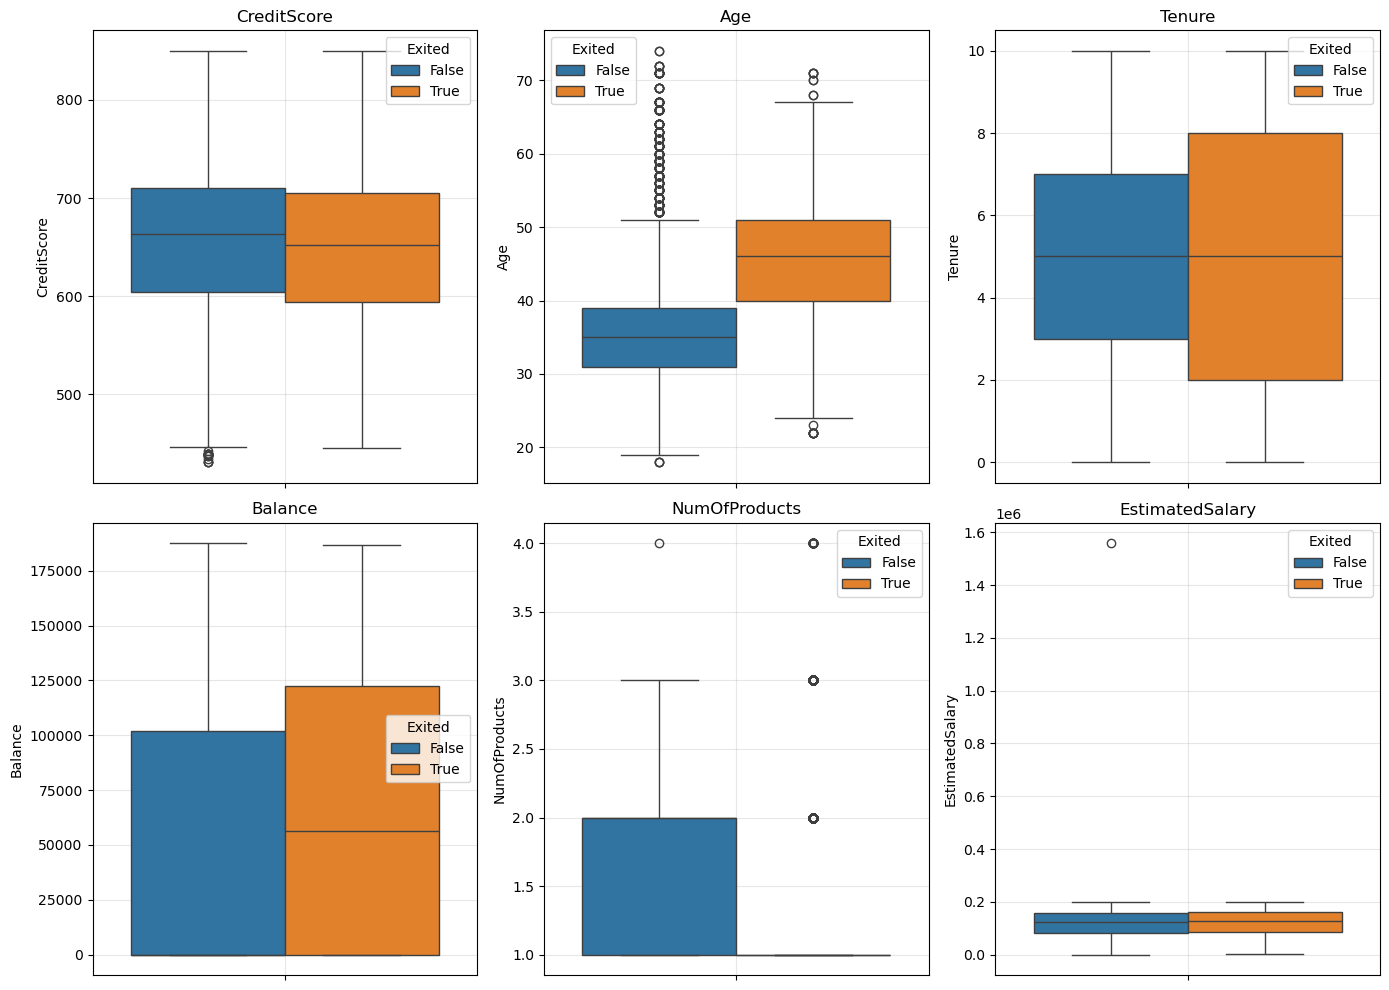

In [78]:
# Box plots para visualizar outliers
fig, axes = plt.subplots(2,3, figsize=(14, 10))
axes = axes.ravel()

numerical_columns = df_numerical.columns.tolist()

for i, column in enumerate(numerical_columns):
    if i < len(axes):
        sns.boxplot(data=df, y=column, ax=axes[i], hue='Exited')
        axes[i].set_title(f'{column}')
        axes[i].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

#### Distribution analysis

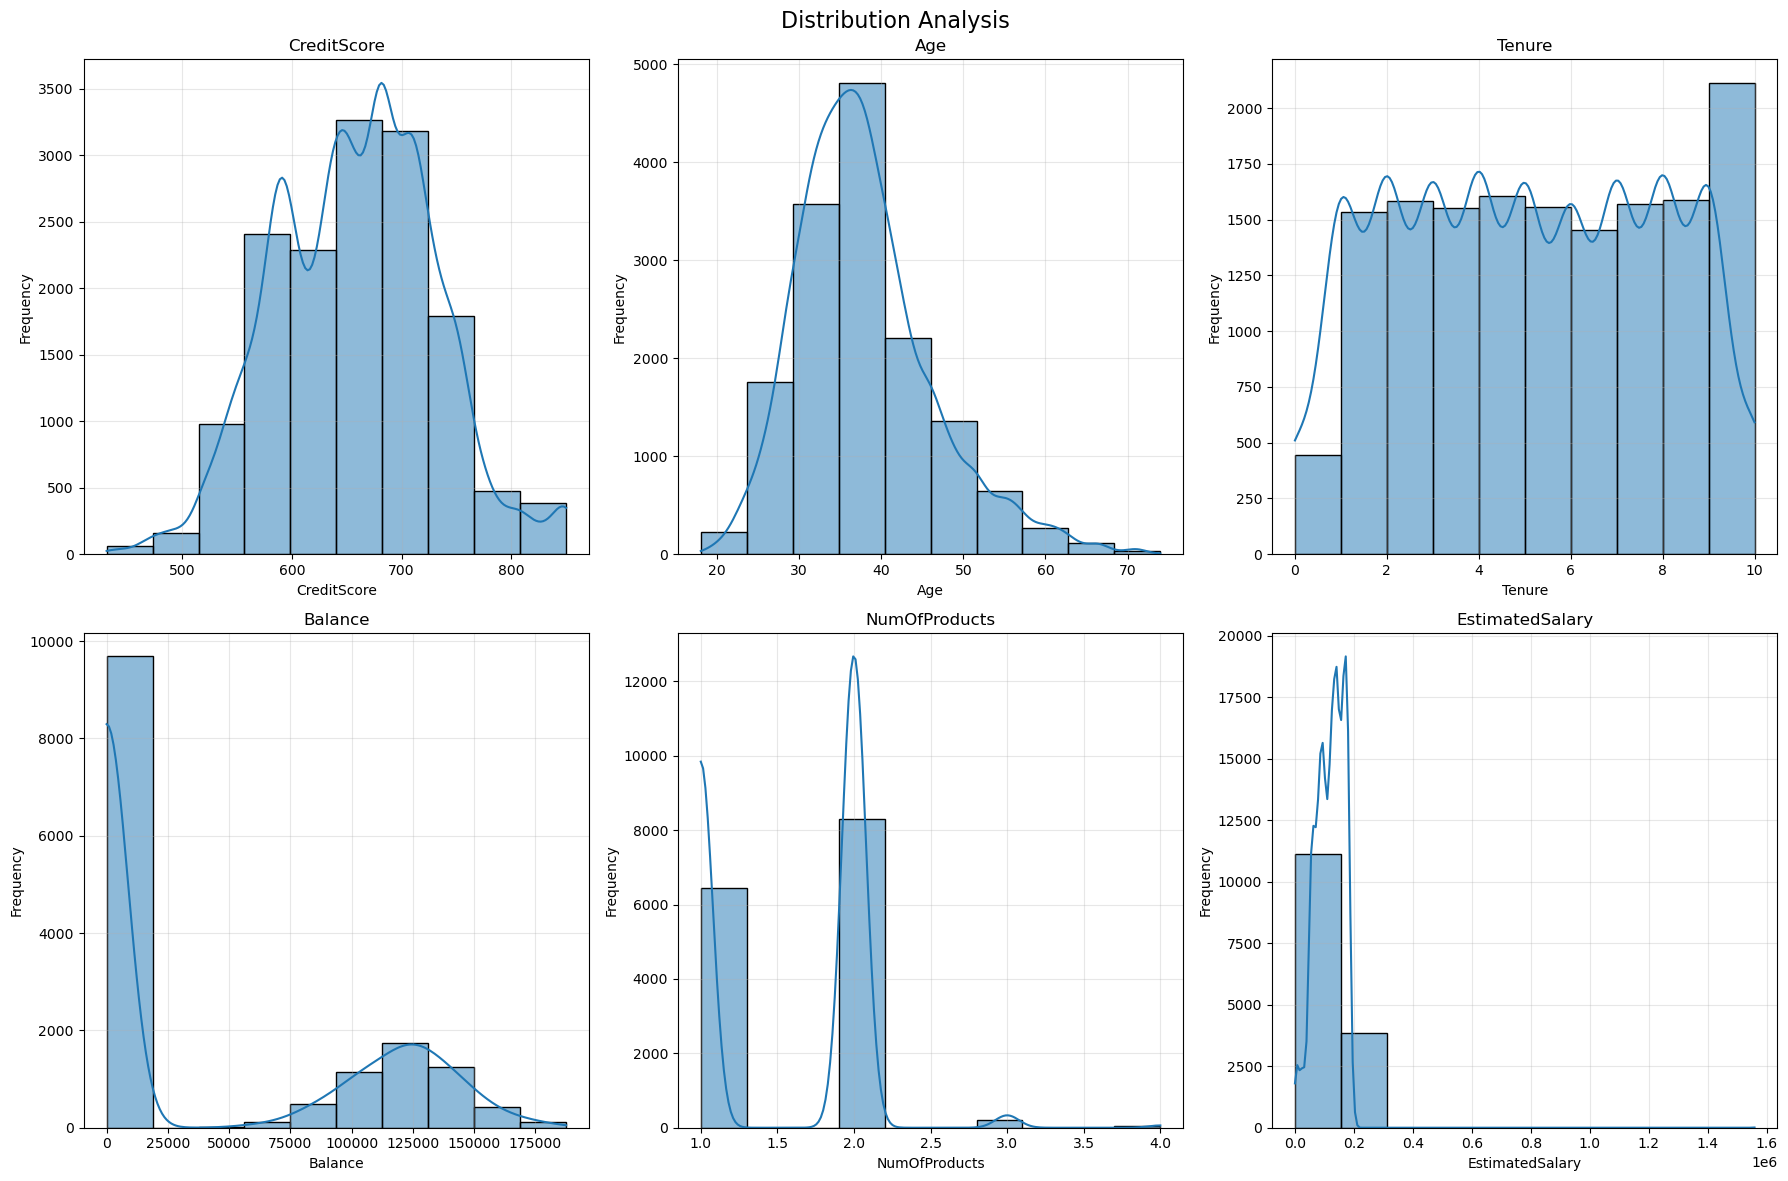

In [79]:
# Distribution analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

numerical_columns = df_numerical.columns.tolist()

for i, column in enumerate(numerical_columns):
    if i < len(axes):
        sns.histplot(data=df, x=column, kde=True, ax=axes[i], bins=10)
        axes[i].set_title(column)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

# Hide unused subplots
for j in range(len(numerical_columns), len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Distribution Analysis', fontsize=16)
plt.tight_layout()
plt.show()

#### Linear Relationship Analysis

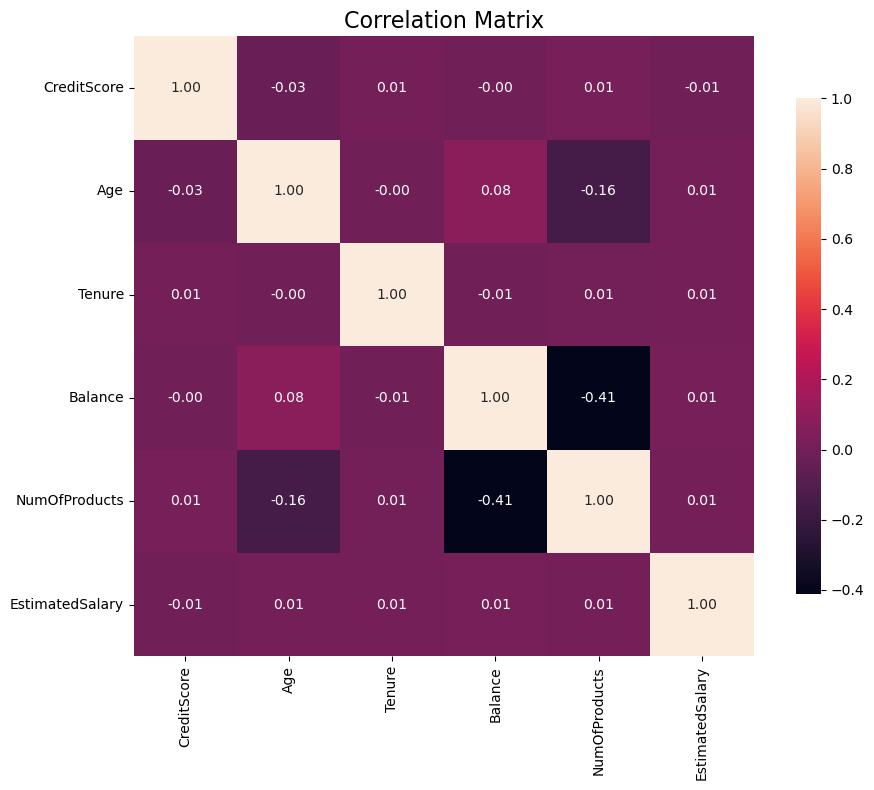

In [80]:
df_numerical = df.select_dtypes(include=['number'])
#Correlation analysis
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()


#### Non-linear relationships analysis

In [81]:
df_numerical = df.select_dtypes(include=['number'])
df_numerical['Exited'] = df['Exited'].astype(bool)

#Non-parametric correlation
from scipy.stats import spearmanr
def spearman_correlation(data, column1, column2):
    correlation, p_value = spearmanr(data[column1], data[column2])
    print(f"Spearman correlation between {column1} and {column2}: {correlation:.2f}, p-value: {p_value:.4f}")

# Apply Spearman correlation to numerical variables
for i in range(len(df_numerical.columns)):
    for j in range(i + 1, len(df_numerical.columns)):
        col1 = df_numerical.columns[i]
        col2 = df_numerical.columns[j]
        spearman_correlation(df_numerical, col1, col2)


Spearman correlation between CreditScore and Age: -0.03, p-value: 0.0002
Spearman correlation between CreditScore and Tenure: 0.01, p-value: 0.2353
Spearman correlation between CreditScore and Balance: -0.00, p-value: 0.7559
Spearman correlation between CreditScore and NumOfProducts: 0.02, p-value: 0.0135
Spearman correlation between CreditScore and EstimatedSalary: -0.01, p-value: 0.2207
Spearman correlation between CreditScore and Exited: -0.05, p-value: 0.0000
Spearman correlation between Age and Tenure: 0.00, p-value: 0.8071
Spearman correlation between Age and Balance: 0.08, p-value: 0.0000
Spearman correlation between Age and NumOfProducts: -0.18, p-value: 0.0000
Spearman correlation between Age and EstimatedSalary: 0.01, p-value: 0.1810
Spearman correlation between Age and Exited: 0.47, p-value: 0.0000
Spearman correlation between Tenure and Balance: -0.01, p-value: 0.4016
Spearman correlation between Tenure and NumOfProducts: 0.01, p-value: 0.4836
Spearman correlation between T

In [60]:
from sklearn.preprocessing import StandardScaler
df_numerical = df.select_dtypes(include=['number'])
# Standardize numerical variables
scaler = StandardScaler()
df_numerical_scaled = df_numerical.copy()
df_numerical_scaled[df_numerical.columns] = scaler.fit_transform(df_numerical[df_numerical.columns])
# Display the first few rows of the scaled DataFrame
df_numerical_scaled.head()

df[df_numerical_scaled.columns] = df_numerical_scaled[df_numerical.columns]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.310864,Spain,Male,0.255779,1.056405,1.000916,0.764172,True,True,0.664583,False
1,-1.100116,France,Female,-1.197510,-1.436236,-0.721429,0.764172,True,False,-1.138114,False
2,1.173094,France,Female,2.193497,-0.011870,-0.721429,-1.103001,True,False,0.869228,True
3,0.525573,France,Male,-1.076403,-1.080145,-0.721429,0.764172,True,False,-1.332415,False
4,-0.425041,France,Female,-1.924154,1.412497,-0.721429,0.764172,True,False,-1.463230,False
...,...,...,...,...,...,...,...,...,...,...,...
14995,0.112263,France,Female,1.587960,-1.436236,-0.721429,-1.103001,False,False,0.250763,True
14996,-1.045008,Spain,Male,1.951282,0.344222,-0.721429,0.764172,False,True,1.151644,True
14997,0.346472,France,Female,-0.470866,-0.367961,-0.721429,0.764172,False,True,0.282656,False
14998,-3.028899,Germany,Male,0.134671,1.056405,1.081384,0.764172,True,True,0.290071,False


In [82]:
#Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
def label_encode_categorical(data, column):
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data

categorical_columns = df_categorical.columns.tolist()
for column in categorical_columns:
    df = label_encode_categorical(df, column)

df.head(10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,754.0,2,1,40.0,8.0,102954.68,2.0,1,1,149238.35,0
1,579.0,0,0,28.0,1.0,0.00,2.0,1,0,64869.32,0
2,744.0,0,0,56.0,5.0,0.00,1.0,1,0,158816.03,1
3,697.0,0,1,29.0,2.0,0.00,2.0,1,0,55775.72,0
4,628.0,0,0,22.0,9.0,0.00,2.0,1,0,49653.39,0
5,850.0,0,1,29.0,2.0,0.00,1.0,0,0,93835.64,0
6,588.0,0,1,23.0,2.0,0.00,2.0,1,1,130189.72,0
7,594.0,2,1,39.0,8.0,0.00,2.0,1,0,155879.57,0
8,652.0,0,0,29.0,4.0,152926.40,1.0,1,1,119882.70,0
9,683.0,1,1,36.0,2.0,123047.86,2.0,1,0,107221.04,0


In [83]:
# Save the processed DataFrame to a new CSV file
df.to_csv("/home/cristian/courses/machine_learning_UNAL/customer_churn_prediction/data/processed/train_processed_no_scaled.csv", index=False)